# All python Libraries for this project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

In [332]:
data=pd.read_csv('heart_disease_data.csv')

In [333]:
data

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2006,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Heart Failure,...,Race,Other,C1,T5,MD501,Crude,BOC04,RAC07,59,NaN
1,2005,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Heart Failure,...,Race,Other,C1,T5,MD501,Crude,BOC04,RAC07,59,NaN
2,2007,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,...,Age,65+,C1,T4,MD301,Crude,BOC03,AGE06,59,NaN
3,2008,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,...,Gender,Female,C1,T4,MD301,Crude,BOC02,GEN02,59,NaN
4,2004,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Heart Failure,...,Overall,Overall,C1,T5,MD501,Crude,BOC01,OVR01,59,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42635,2012,CO,Colorado,Medicare,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,...,Gender,Male,C1,T6,MD601,Crude,BOC02,GEN01,8,"(38.843840757000464, -106.13361092099967)"
42636,2010,MI,Michigan,Medicare,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,...,Gender,Female,C1,T6,MD601,Crude,BOC02,GEN02,26,"(44.6613195430005, -84.71439026999968)"
42637,2012,ME,Maine,Medicare,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,...,Race,Hispanic,C1,T6,MD601,Crude,BOC04,RAC04,23,"(45.254228894000505, -68.98503133599962)"
42638,2013,ID,Idaho,Medicare,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,...,Race,Non-Hispanic White,C1,T6,MD601,Crude,BOC04,RAC01,16,"(43.682630005000476, -114.3637300419997)"


In [70]:
data.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'DataSource', 'PriorityArea1',
       'PriorityArea2', 'PriorityArea3', 'PriorityArea4', 'Category', 'Topic',
       'Indicator', 'Data_Value_Type', 'Data_Value_Unit', 'Data_Value',
       'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'Break_Out_Category',
       'Break_Out', 'CategoryId', 'TopicId', 'IndicatorID',
       'Data_Value_TypeID', 'BreakOutCategoryId', 'BreakOutId', 'LocationID',
       'GeoLocation', 'Category by medicaid = 1, medicare = 2'],
      dtype='object')

# Finding and filling the nulls values

In [337]:
data.isna()
data.isna().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
PriorityArea1                     0
PriorityArea2                     0
PriorityArea3                     0
PriorityArea4                     0
Category                          0
Topic                             0
Indicator                         0
Data_Value_Type                   0
Data_Value_Unit                   0
Data_Value                      529
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    42111
Data_Value_Footnote           42111
LowConfidenceLimit              529
HighConfidenceLimit             529
Break_Out_Category                0
Break_Out                         0
CategoryId                        0
TopicId                           0
IndicatorID                       0
Data_Value_TypeID                 0
BreakOutCategoryId                0
BreakOutId                        0
LocationID                  

In [33]:
final_data1= data[['Year', 'LocationDesc', 'Topic', 'Data_Value', 'LowConfidenceLimit', 'HighConfidenceLimit']]
final_data1

,Year,LocationDesc,Topic,Data_Value,LowConfidenceLimit,HighConfidenceLimit
0,2006,United States,Heart Failure,5.2,5.1,5.3
1,2005,United States,Heart Failure,5.1,5.1,5.2
2,2007,United States,Coronary Heart Disease,8.5,8.4,8.5
3,2008,United States,Coronary Heart Disease,5.1,5.1,5.1
4,2004,United States,Heart Failure,6.1,6.1,6.1
...,...,...,...,...,...,...
42635,2012,Colorado,Stroke,3.7,3.6,3.9
42636,2010,Michigan,Stroke,3.4,3.3,3.5
42637,2012,Maine,Stroke,NaN,NaN,NaN
42638,2013,Idaho,Stroke,4.5,4.3,4.7


In [105]:
final_data1['Data_Value'].fillna(final_data1['Data_Value'].mean(), inplace = True)

In [106]:
final_data1['LowConfidenceLimit'].fillna(final_data1['LowConfidenceLimit'].mean(), inplace = True)

In [107]:
final_data1['HighConfidenceLimit'].fillna(final_data1['HighConfidenceLimit'].mean(), inplace = True)

# Finding the outliers 

In [ ]:
sns.boxplot(data=final_data1, x='Data_Value')

In [137]:
q1,q3 = np.percentile(final_data1['Data_Value'],[25,75])
iqr=q3-q1
lower_fence=q1-1.5*(iqr)
higher_fence=q3+1.5*(iqr)
print (lower_fence, higher_fence)

-19.75 44.650000000000006


In [138]:
print((final_data1['Data_Value'] <= lower_fence).value_counts())
print((final_data1['Data_Value'] >= higher_fence).value_counts())

False    41204
Name: Data_Value, dtype: int64
False    40945
True       259
Name: Data_Value, dtype: int64


In [139]:
low_outliers = final_data1['Data_Value'] < lower_fence
high_outliers = final_data1['Data_Value'] > higher_fence
outliers = low_outliers | high_outliers
filtered_data = final_data1[outliers]
outliers.sum()

259

<AxesSubplot:xlabel='LowConfidenceLimit'>

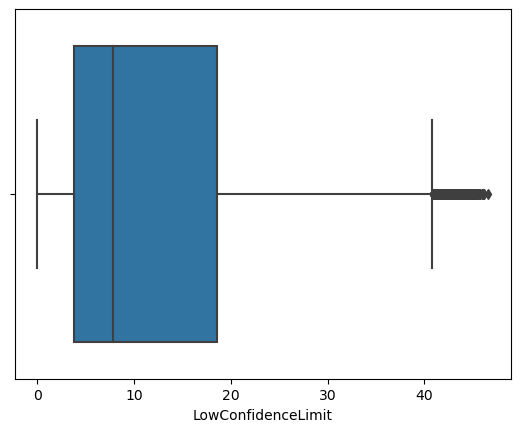

In [140]:
sns.boxplot(data=final_data1, x='LowConfidenceLimit')

In [141]:
q1,q3 = np.percentile(final_data1['LowConfidenceLimit'],[25,75])
iqr=q3-q1
lower_fence=q1-1.5*(iqr)
higher_fence=q3+1.5*(iqr)
print (lower_fence, higher_fence)

-18.400000000000002 40.800000000000004


In [132]:
low_outliers = final_data1['LowConfidenceLimit'] < lower_fence
high_outliers = final_data1['LowConfidenceLimit'] > higher_fence
outliers = low_outliers | high_outliers
filtered_data = final_data1[outliers]
outliers.sum()

315

<AxesSubplot:xlabel='HighConfidenceLimit'>

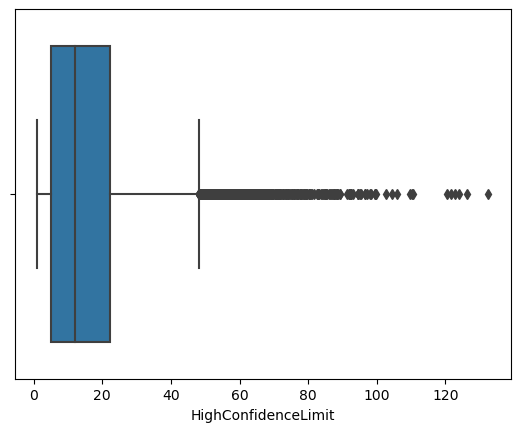

In [142]:
sns.boxplot(data=final_data1, x='HighConfidenceLimit')

In [143]:
q1,q3 = np.percentile(final_data1['HighConfidenceLimit'],[25,75])
iqr=q3-q1
lower_fence=q1-1.5*(iqr)
higher_fence=q3+1.5*(iqr)
print (lower_fence, higher_fence)

-20.950000000000003 48.25


In [147]:
low_outliers = final_data1['HighConfidenceLimit'] < lower_fence
high_outliers = final_data1['HighConfidenceLimit'] > higher_fence
outliers = low_outliers | high_outliers
filtered_data = final_data1[outliers]
outliers.sum()

708

<AxesSubplot:xlabel='Year'>

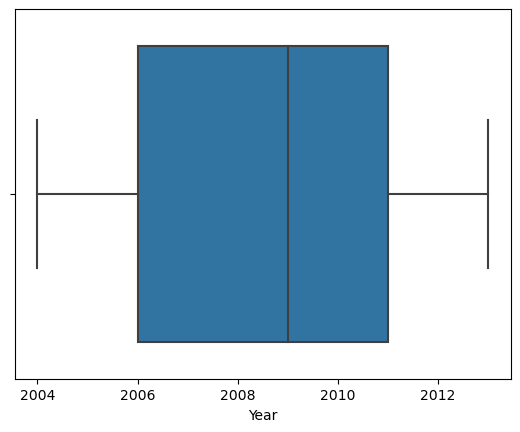

In [236]:
sns.boxplot(data=final_data1, x='Year')

# Graphical Visualization

<AxesSubplot:>

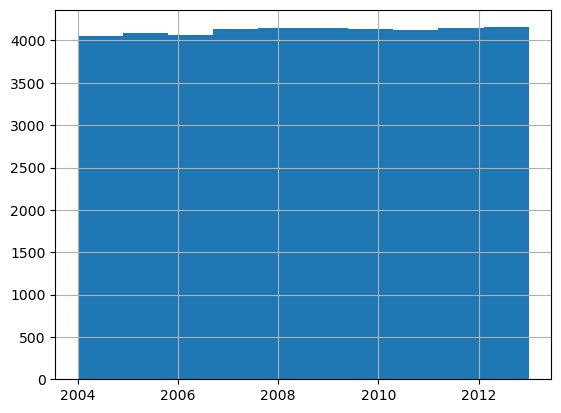

In [334]:
final_data1.Year.hist()

<AxesSubplot:xlabel='Year', ylabel='Count'>

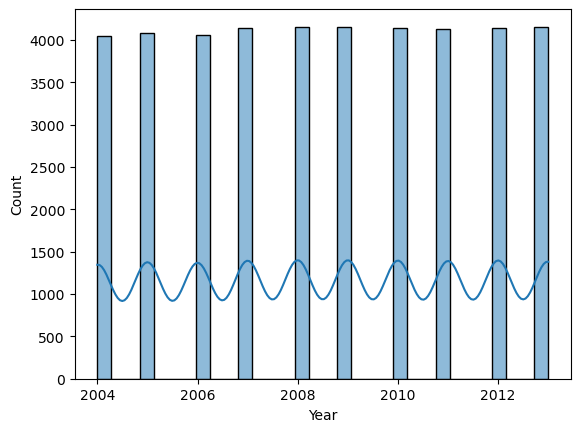

In [230]:
sns.histplot(final_data1['Year'], kde = True)

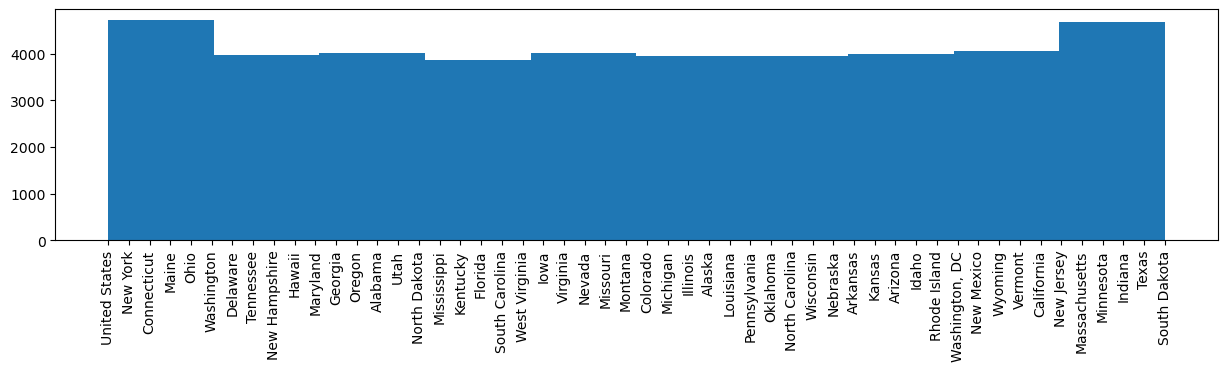

In [229]:
fig = plt.figure(figsize=(15, 3))
plt.hist(final_data1['LocationDesc'])
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = [6.4, 4.8]
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

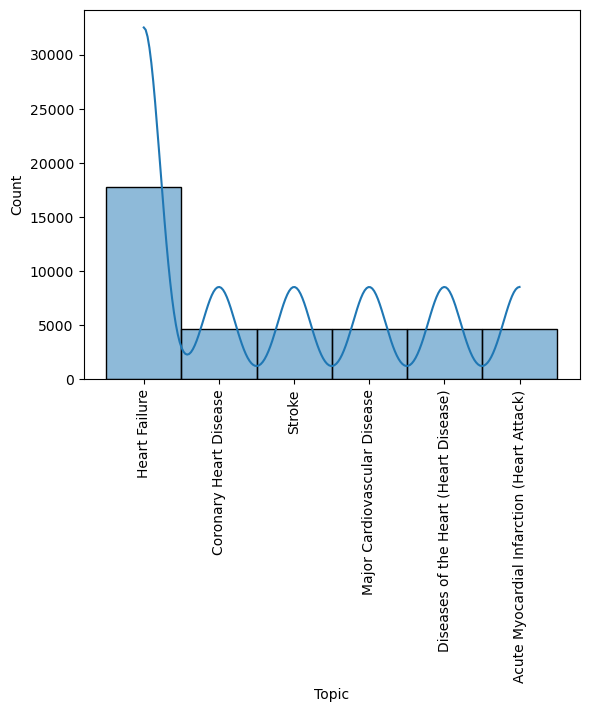

In [232]:
sns.histplot(final_data1['Topic'], kde = True)
plt.xticks(rotation = 90)


<AxesSubplot:xlabel='Data_Value', ylabel='Count'>

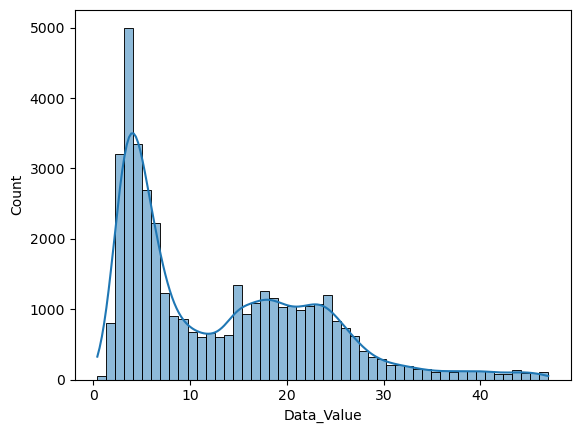

In [233]:
sns.histplot(final_data1['Data_Value'], kde = True)

<AxesSubplot:xlabel='LowConfidenceLimit', ylabel='Count'>

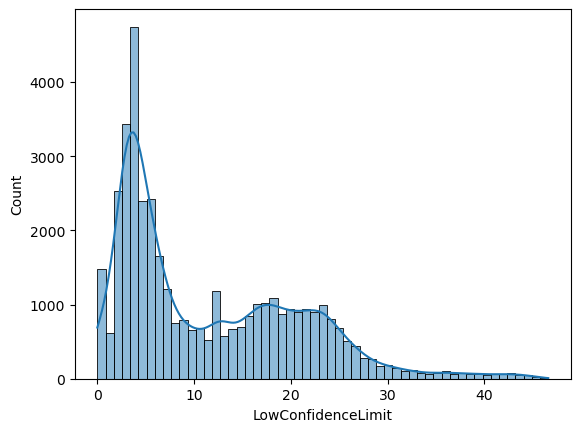

In [335]:
sns.histplot(final_data1['LowConfidenceLimit'], kde = True)

<AxesSubplot:xlabel='HighConfidenceLimit', ylabel='Count'>

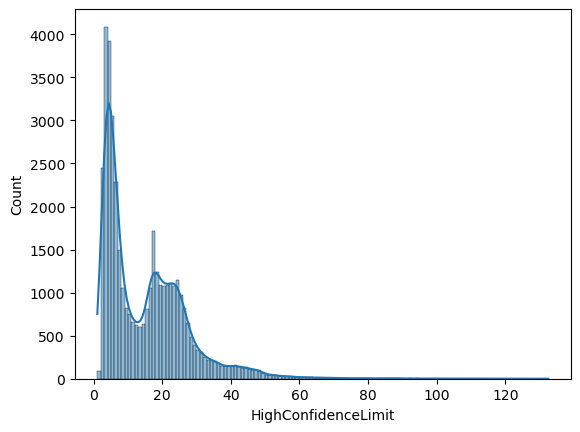

In [336]:
sns.histplot(final_data1['HighConfidenceLimit'], kde = True)

# Exploring the values with some sort of sequence 

In [273]:
pivot1 = final_data1.pivot_table(index=['Topic'], values=['LowConfidenceLimit'], aggfunc='mean')
print (pivot1.round(2))

                                            LowConfidenceLimit
Topic                                                         
Acute Myocardial Infarction (Heart Attack)                2.55
Coronary Heart Disease                                    5.84
Diseases of the Heart (Heart Disease)                    16.55
Heart Failure                                            13.30
Major Cardiovascular Disease                             22.47
Stroke                                                    3.42


In [272]:
pivot = final_data1.pivot_table(index=['Topic'], values=['HighConfidenceLimit'], aggfunc='mean')
print (pivot.round(2))

                                            HighConfidenceLimit
Topic                                                          
Acute Myocardial Infarction (Heart Attack)                 3.56
Coronary Heart Disease                                     7.37
Diseases of the Heart (Heart Disease)                     18.95
Heart Failure                                             19.24
Major Cardiovascular Disease                              25.18
Stroke                                                     4.61


In [270]:
pivot2 = final_data1.pivot_table(index=['Topic'], values=['Data_Value'], aggfunc='mean')
print (pivot2.round(2))

                                            Data_Value
Topic                                                 
Acute Myocardial Infarction (Heart Attack)        3.03
Coronary Heart Disease                            6.58
Diseases of the Heart (Heart Disease)            17.74
Heart Failure                                    16.14
Major Cardiovascular Disease                     23.82
Stroke                                            3.99


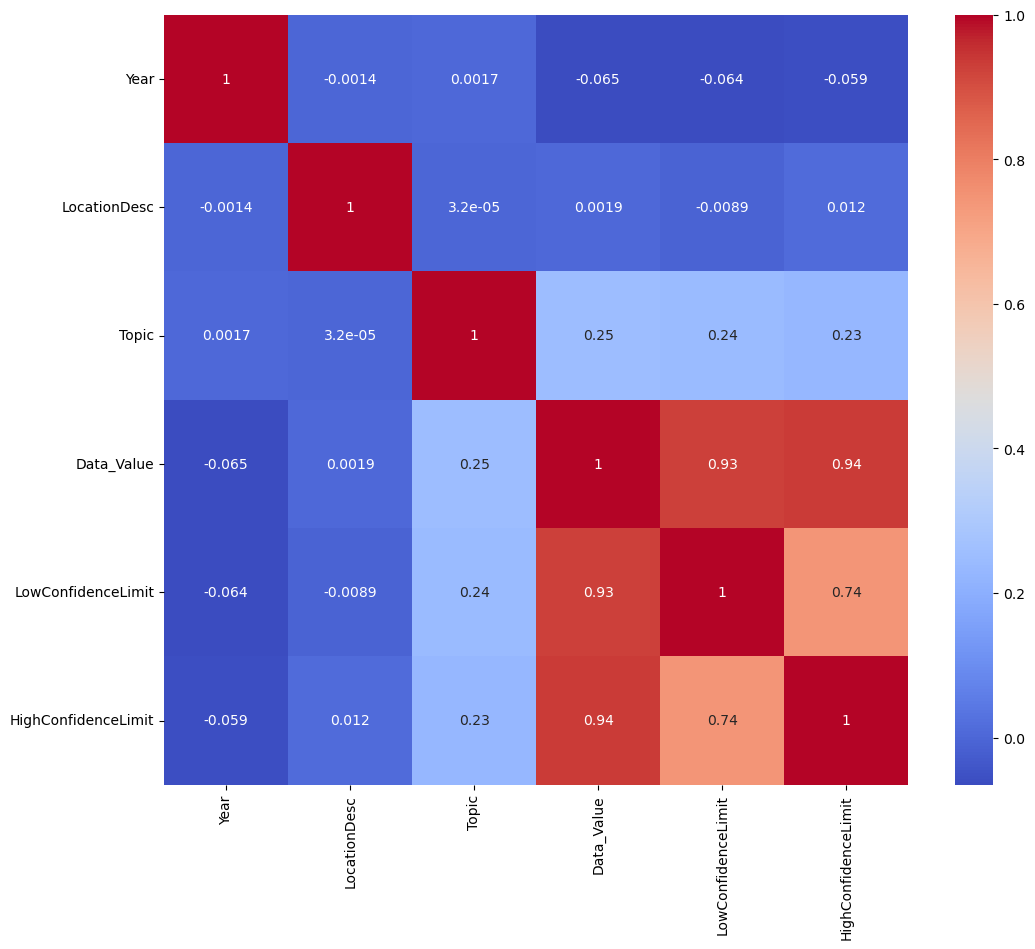

In [330]:
corr_matrix = final_data1.corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=ax)
plt.show()


# Preparing the data for prediction using ML models

In [285]:
le = LabelEncoder()
final_data1['Topic'] = le.fit_transform(final_data1['Topic'])
final_data1['LocationDesc'] = le.fit_transform(final_data1['LocationDesc'])

In [319]:
X = final_data1.drop('Topic', axis=1)
X = final_data1.drop('LocationDesc', axis=1)
y = final_data1['Topic']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ML Models

In [327]:
model = LGBMClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
Accuracy = model.score(X_test,y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [328]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
accuracy = tree_model.score(X_test, y_test)

print("Accuracy:", accuracy)

Accuracy: 1.0
